Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 6
---------

# Pneumonia Classification using Chest X-rays based on Convolutional Neural Nets

### Objectives:
1. Study the Pneumonia dataset.
2. Study CNN in detail.
3. Implement the same using Google Colab.

### Theory:
Pneumonia is an infection that inflames the air sacs in the lungs, which may fill with fluid or pus. Chest X-ray images are commonly used to diagnose pneumonia. The dataset for pneumonia detection typically contains chest X-ray images labeled as either pneumonia or normal.

A Convolutional Neural Network (CNN) is a type of deep learning algorithm that takes in an image as input, assigns importance (learnable weights and biases) to various aspects/objects in the image, and is able to differentiate one from the other. In the context of pneumonia classification, a CNN model can be trained to automatically detect pneumonia from X-ray images.

### Code:

In [12]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Dataset:
The dataset can be found here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
We will use ImageDataGenerator to load the data and perform real-time data augmentation.

In [13]:
# Loading and preprocessing the data

# Setting up directories for training and validation datasets
import os
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

# Image data generator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### CNN Model
The model will consist of convolutional layers, followed by max pooling, and a fully connected layer at the end.

In [14]:
# Building the CNN model
model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters and a kernel size of 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second convolutional layer with 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third convolutional layer with 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fourth convolutional layer with 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the output from the convolutional layers before feeding it into fully connected layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 512 units
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer with 1 unit (for binary classification) using sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Compiling the Model
We compile the model using the Adam optimizer and binary cross-entropy as the loss function, since this is a binary classification task.

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [16]:
# Training the model on the training data and validating on the validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729775984.852461     111 service.cc:145] XLA service 0x7ec9380018b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729775984.852519     111 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729775984.852524     111 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/163 ━━━━━━━━━━━━━━━━━━━━ 31:57 12s/step - accuracy: 0.3438 - loss: 0.6961

I0000 00:00:1729775990.664268     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 519ms/step - accuracy: 0.8057 - loss: 0.4243 - val_accuracy: 0.9375 - val_loss: 0.2383
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2383
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.9547 - loss: 0.1146 - val_accuracy: 0.6875 - val_loss: 0.7611
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.7611
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.9698 - loss: 0.0781 - val_accuracy: 0.9375 - val_loss: 0.1316
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.1316
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accuracy: 0.9751 - loss: 0.0584 - val_accuracy: 0.8750 - val_loss: 0.3272
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3272
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.9762 - loss: 0.0663 - val_accuracy: 0.8125 - val_loss: 0.4082
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.0000e+00

### Plotting Accuracy and Loss

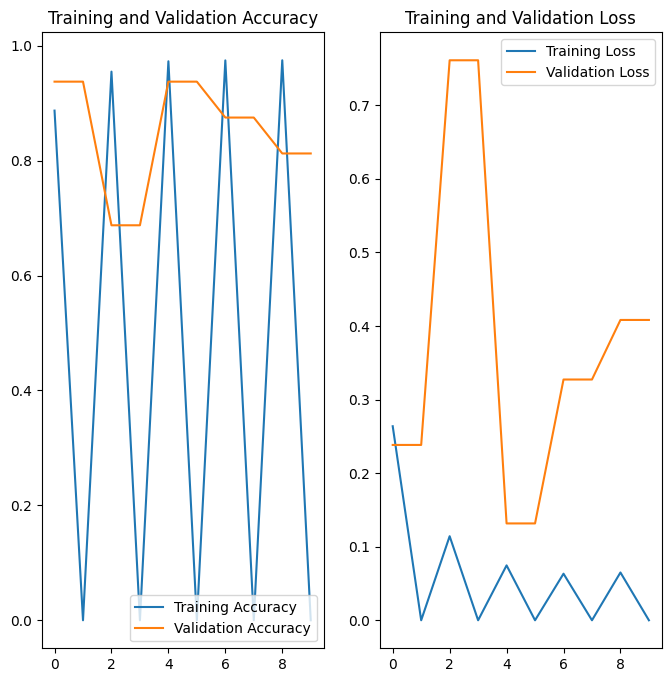

In [17]:
# Plotting accuracy and loss during training and validation
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

### Evaluating the Model

In [18]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation accuracy: {val_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8125 - loss: 0.4082

Validation accuracy: 0.8125


### Conclusion
In this notebook, we implemented a CNN to classify pneumonia using chest X-ray images. CNNs are well-suited for image classification tasks as they can automatically learn spatial hierarchies of features. While this model can detect pneumonia with a reasonable accuracy of 81.25%, there is still room for improvement, such as experimenting with deeper networks or other architectures like transfer learning for better performance.